<a href="https://colab.research.google.com/github/JackFullerton/JackFullerton.github.io/blob/master/group_practical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

Import Libraries

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Import Data

In [68]:
# Load the datasets
application_df = pd.read_csv('sample_data/application_record.csv')
credit_df = pd.read_csv('sample_data/credit_record.csv')

# FORMATTING


In [61]:
merged_df = pd.merge(application_df, credit_df, on='ID')
merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4,C


In [62]:
# Remove dupicates
# Drop all empty value rows, drop duplicate rows and keep first entry
cleaned_df = merged_df.dropna().drop_duplicates(subset='ID', keep='first')
cleaned_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0,C
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,0,0
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,-22,X
71,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,0,C
98,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,0,C



# ANALYSIS


In [82]:
# Use cleaned_df
# First want to add a boolean if a customer has a STATUS of [0,1,2,3,4,5]
statuses = ['0','1','2','3','4','5']
cleaned_df['has_Overdue'] = np.where(cleaned_df.STATUS.isin(statuses),1,0)
cleaned_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,has_Overdue
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0,C,0
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,0,0,1
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,-22,X,0
71,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,0,C,0
98,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,0,C,0


In [83]:
cleaned_df['has_Overdue'].value_counts()

0    18860
1     6031
Name: has_Overdue, dtype: int64

In [84]:
# Put in the columns that we want to make the dummie variable of
df1 = pd.get_dummies(merged_df, columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'], drop_first = False)
df1['has_Overdue'] = np.where(df7.STATUS.isin(statuses), 1, 0)


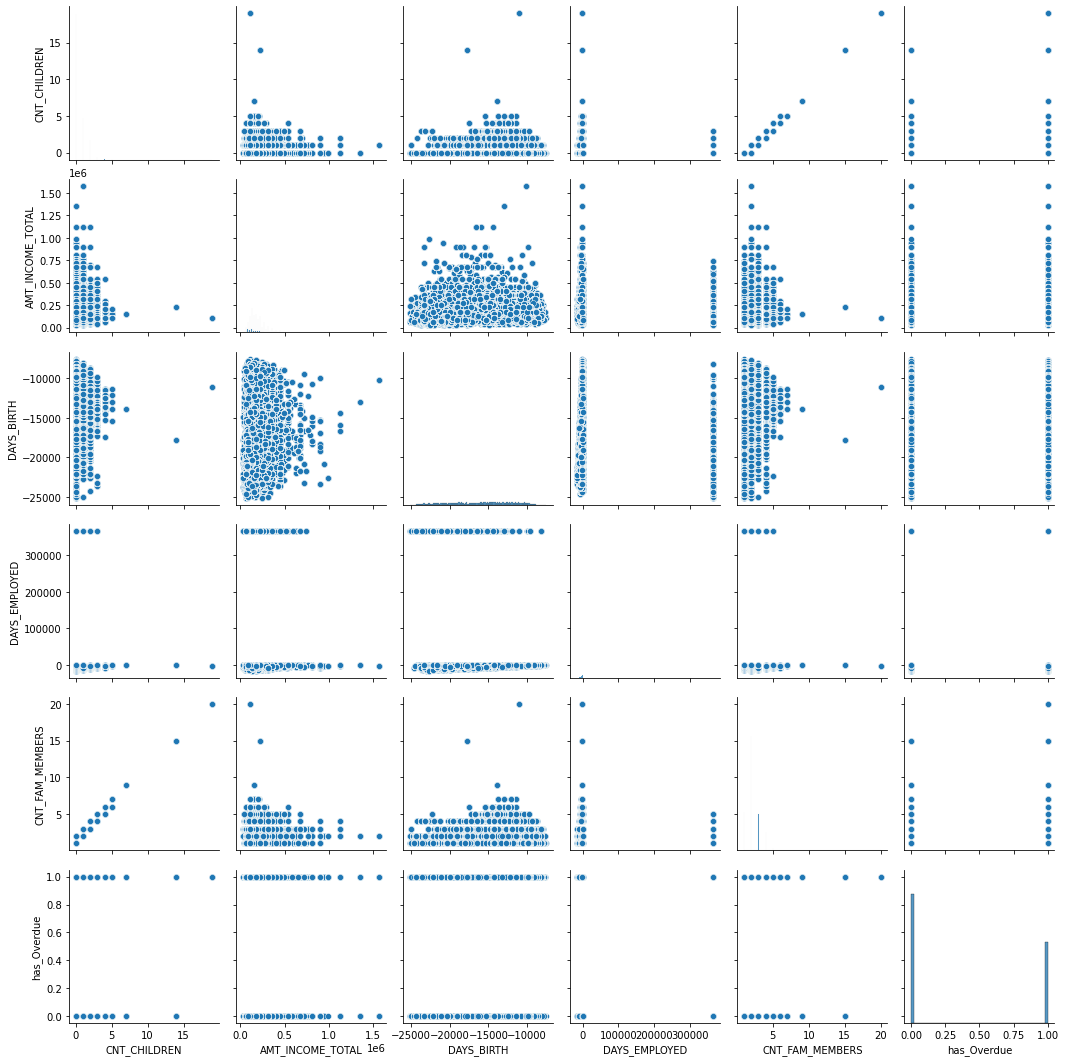

In [85]:
sns.pairplot(df1[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'has_Overdue']])

In [97]:
Features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents']

In [98]:
train, test = train_test_split(df1, test_size = 0.3, random_state=21)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[Features]
label_train = train['has_Overdue']
features_test = test[Features]
label_test = test['has_Overdue']

In [99]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(features_train, label_train)

train_predict = tree.predict(features_train)
test_predict = tree.predict(features_test)

In [100]:
train_acc = (accuracy_score(train_predict,label_train)) * 100
test_acc = (accuracy_score(test_predict,label_test)) * 100
print('Training Accuracy is ' + str(round(train_acc, 4)) + '%')
print('Test Accuracy is ' +  str(round(test_acc, 4)) + '%')

Training Accuracy is 72.4555%
Test Accuracy is 71.5932%


# **Feature Importance Visualisation**

Showcases which features the bank may want to use when approving customers for credit.

(The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

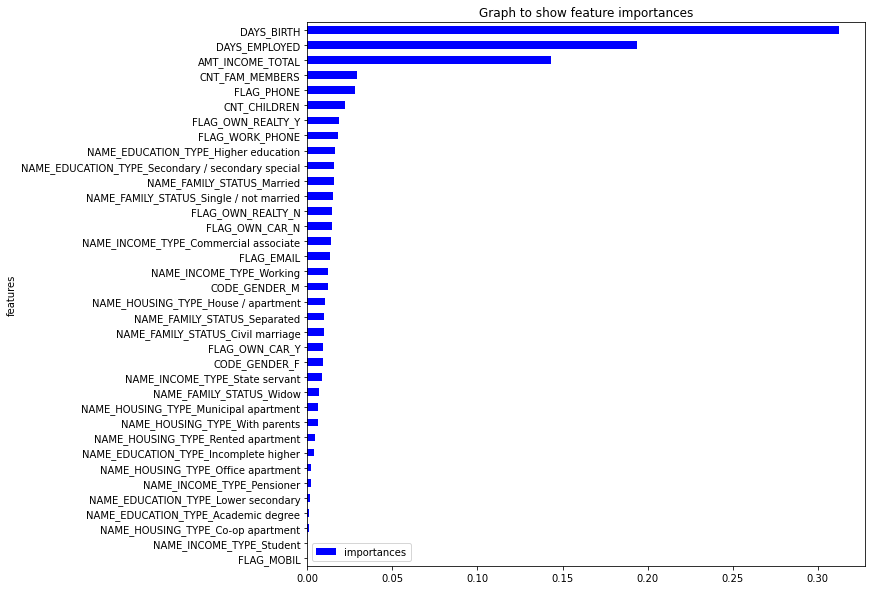

In [101]:
df2=pd.DataFrame({'features':features_train.columns,'importances':tree.feature_importances_})
df2.sort_values('importances',inplace=True)
df2.plot(kind='barh', title = 'Graph to show feature importances', y='importances',x='features',color='blue', figsize=(10,10))

1.7x more females than males

In [120]:
cleaned_df['CODE_GENDER'].value_counts()

F    15516
M     9375
Name: CODE_GENDER, dtype: int64

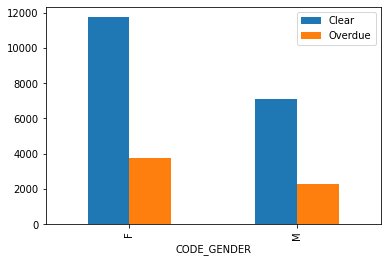

In [91]:
pd.crosstab(cleaned_df.CODE_GENDER,cleaned_df.has_Overdue).plot(kind='bar')
plt.legend(labels = ['Clear','Overdue'])

Males are valued 1.33x more important 

In [119]:
print("Male importance: "+str(df2['importances'][10]))
print("Female importance: "+str(df2['importances'][9]))

Male importance: 0.011887307892438874
Female importance: 0.008956905111229334
